 # **Introduction**
 This is a case study project named 'Cyclistic bike-share analysis' as [Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics) Capstone Project. This project is carried out by using R programming language and includes the following steps of the data analysis process:
 * Ask
 * Prepare
 * Process
 * Analyze
 * Share 
 * Act
 
This data has been proposed by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement).

### Objective

The objective of this Case Study is to understand how casual riders and annual members use Cyclistic bikes differently. Cyclistic executives will go through the resulting recommendations for action, which should be relied on compelling data insights and professional data visualizations. Thus, as per the obtained insights, the marketing team will design a new strategy to convert casual riders into annual members. 

The time period under consideration for this analysis is from **September 01, 2021** to **August 31, 2022**.

# 1. Ask
### 1.2 Business Task
Identifying trends and connections of bike usage patterns among casual riders and annual members by analyzing historical trip data from the past 12 months, so that a successful marketing campaign can be carried out for casual riders. As a result of this campaign, casual riders should prefer to sign up for annual membership.

### 1.3 Key Stakeholders
* **Primary Stakeholders**:

 Lily Moreno, Director of Marketing
 
 Cyclistic Executive Team
* **Secondary Stakeholders**:

 Marketing Analytics Team

# 2. Prepare

### 2.1 Data Structure
This data is proposed by the Google Data Analytics Professional Certificate course as a publicly available resource. I have uploaded files (in CSV format) containing data for the period from September 2021 to August 2022. Each month for this period is represented by a separate file, which contains a table with 13 columns and tens of thousands of observations. Columns in this data represent crucial information for rides identified by unique id (first column), such as type of bike used, start date, ending date, name, and coordinates of starting and ending stations as well as the type of customers (casual or member).

### 2.2 Data Preparation
First of all, I will add the necessary packages for my analysis:

In [1]:
library('tidyverse')
library('ggplot2')
library('lubridate')
library('data.table')
library('dplyr')
library('formattable')

#let's set the plot size for our analysis:
options(repr.plot.width=15, repr.plot.height=7)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘formattable’


The following object is masked from ‘package:bigrquery’:

    format_table




Now, I can load the necessary data representing monthly information for analysis (12 files):

In [2]:
sep21_trip <- read_csv('../input/cyclistic-capstone/202109-divvy-tripdata.csv', show_col_types = FALSE)
oct21_trip <- read_csv('../input/cyclistic-capstone/202110-divvy-tripdata.csv', show_col_types = FALSE)
nov21_trip <- read_csv('../input/cyclistic-capstone/202111-divvy-tripdata.csv', show_col_types = FALSE )
dec21_trip <- read_csv('../input/cyclistic-capstone/202112-divvy-tripdata.csv', show_col_types = FALSE)
jan22_trip <- read_csv('../input/cyclistic-capstone/202201-divvy-tripdata.csv', show_col_types = FALSE)
feb22_trip <- read_csv('../input/cyclistic-capstone/202202-divvy-tripdata.csv', show_col_types = FALSE)
mar22_trip <- read_csv('../input/cyclistic-capstone/202203-divvy-tripdata.csv', show_col_types = FALSE)
apr22_trip <- read_csv('../input/cyclistic-capstone/202204-divvy-tripdata.csv', show_col_types = FALSE)
may22_trip <- read_csv('../input/cyclistic-mayjunejulyaugust2022/202205-divvy-tripdata.csv', show_col_types = FALSE)
jun22_trip <- read_csv('../input/cyclistic-mayjunejulyaugust2022/202206-divvy-tripdata.csv', show_col_types = FALSE)
jul22_trip <- read_csv('../input/cyclistic-mayjunejulyaugust2022/202207-divvy-tripdata.csv', show_col_types = FALSE)
aug22_trip <- read_csv('../input/cyclistic-mayjunejulyaugust2022/202208-divvy-tripdata.csv', show_col_types = FALSE)


Before joining all tables into single dataframe, I would like to ensure that all respective columns are matching among months:

In [3]:
glimpse(sep21_trip)
glimpse(oct21_trip)
glimpse(nov21_trip)
glimpse(dec21_trip)
glimpse(jan22_trip)
glimpse(feb22_trip)
glimpse(mar22_trip)
glimpse(apr22_trip)
glimpse(may22_trip)
glimpse(jun22_trip)
glimpse(jul22_trip)
glimpse(aug22_trip)

Rows: 756,147
Columns: 13
$ ride_id            <chr> "9DC7B962304CBFD8", "F930E2C6872D6B32", "6EF7213790…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2021-09-28 16:07:10, 2021-09-28 14:24:51, 2021-09-…
$ ended_at           <dttm> 2021-09-28 16:09:54, 2021-09-28 14:40:05, 2021-09-…
$ start_station_name <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, "Clark St &…
$ start_station_id   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, "TA13070001…
$ end_station_name   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ end_station_id     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ start_lat          <dbl> 41.89000, 41.94000, 41.81000, 41.80000, 41.88000, 4…
$ start_lng          <dbl> -87.68000, -87.64000, -87.72000, -87.72000, -87.740…
$ end_lat            <dbl> 41.89, 41.98, 41.80, 41.81, 41.88, 41.88, 41.74, 41…
$ end_lng            <dbl> -87.67, -87.67, -87.72, -87.72, -87.71, -87.74, -87…
$ member_casua

Upon this check, I can join all data into a single data frame and overview the resulting structure:

In [4]:
trips_full <- bind_rows(sep21_trip, oct21_trip, nov21_trip, dec21_trip, jan22_trip, feb22_trip, mar22_trip, apr22_trip, may22_trip, jun22_trip, jul22_trip, aug22_trip)
str(trips_full)
head(trips_full)

spec_tbl_df [5,883,043 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5883043] "9DC7B962304CBFD8" "F930E2C6872D6B32" "6EF72137900BB910" "78D1DE133B3DBF55" ...
 $ rideable_type     : chr [1:5883043] "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct[1:5883043], format: "2021-09-28 16:07:10" "2021-09-28 14:24:51" ...
 $ ended_at          : POSIXct[1:5883043], format: "2021-09-28 16:09:54" "2021-09-28 14:40:05" ...
 $ start_station_name: chr [1:5883043] NA NA NA NA ...
 $ start_station_id  : chr [1:5883043] NA NA NA NA ...
 $ end_station_name  : chr [1:5883043] NA NA NA NA ...
 $ end_station_id    : chr [1:5883043] NA NA NA NA ...
 $ start_lat         : num [1:5883043] 41.9 41.9 41.8 41.8 41.9 ...
 $ start_lng         : num [1:5883043] -87.7 -87.6 -87.7 -87.7 -87.7 ...
 $ end_lat           : num [1:5883043] 41.9 42 41.8 41.8 41.9 ...
 $ end_lng           : num [1:5883043] -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ memb

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NA,NA,NA,NA,41.89,-87.68,41.89,-87.67,casual
F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NA,NA,NA,NA,41.94,-87.64,41.98,-87.67,casual
6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NA,NA,NA,NA,41.81,-87.72,41.80,-87.72,casual
78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NA,NA,NA,NA,41.80,-87.72,41.81,-87.72,casual
E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NA,NA,NA,NA,41.88,-87.74,41.88,-87.71,casual
346DE323A2677DC0,electric_bike,2021-09-28 01:53:18,2021-09-28 02:00:02,NA,NA,NA,NA,41.87,-87.75,41.88,-87.74,casual


# 3. Process

### 3.1 Data Cleaning

Upon completion of the preparation phase, we can start with data cleaning for insightful analysis. First of all, we need to inspect the columns for missing values. Before removing rows with missing values, we need to identify the possible impact of this on the overall data by calculating the proportion of missing data for each column separately:

In [5]:
na_values <- sapply(trips_full, function(count) sum(length(which(is.na(count)))))
na_values <- data.frame(na_proportion = na_values/nrow(trips_full) * 100)
na_values

,na_proportion
,<dbl>
ride_id,0.00000000
rideable_type,0.00000000
started_at,0.00000000
ended_at,0.00000000
start_station_name,15.03244154
start_station_id,15.03240755
end_station_name,16.08526404
end_station_id,16.08526404
start_lat,0.00000000


As per the obtained output, we can conclude that there are missing values making roughly 15% for columns 'start_station_name'/'start_station_id'/'end_station_name'/'end_station_id'. Since these columns are not crucial for our analysis, we will keep them rather than remove 15% of the respective data. In addition, there is a miserable proportion of missing values for 'end_lat' and 'end_lng', so we can remove missing values from these columns:


In [6]:
trips_full_clean <- trips_full %>%
drop_na(end_lat, end_lng)

We need to remove the duplicate values based on 'ride_id':

In [7]:
trips_full_clean <- trips_full_clean[!duplicated(trips_full_clean$ride_id),]

### 3.2 Additional Calculations

In order to ensure insightful conclusions from our analysis, we will add some new columns based on the existing data by making additional calculations. This will allow us to aggregate the data for further analysis.

Initially, we will add columns for the day of the week, month, day, and time of the day for identifying the usage trend for different time units:

In [8]:
trips_full_clean$start_date <- as.Date(trips_full_clean$started_at)
trips_full_clean$day_of_week <- format(as.Date(trips_full_clean$start_date),'%u %a')
trips_full_clean$month <- format(as.Date(trips_full_clean$start_date), '%Y %m %B')
trips_full_clean$day <- format(as.Date(trips_full_clean$start_date), '%Y')
trips_full_clean$time <- format(trips_full_clean$started_at, '%H')

In order to understand how long riders were using bikes, we should calculate the duration of each ride in the following way:

In [9]:
trips_full_clean <- trips_full_clean %>%
mutate(ride_duration = as.numeric(difftime(ended_at, started_at, units = 'mins')))

However, we need to check if the ride_duration column has any negative values because it can hinder our further analysis. In addition, it is better to remove the trips from our data frame, which were carried out by the company itself for quality inspection (these trips are indicated in the table by the 'test' keyword):

In [10]:
print(paste('There are ', nrow(subset(trips_full_clean, ride_duration < 0)), 'rows with negative ride duration' ))
print(paste('There is ',nrow(subset(trips_full_clean, start_station_name %like% 'TEST')) + 
    nrow(subset(trips_full_clean, start_station_name %like% 'Test')) + nrow(subset(trips_full_clean, start_station_name %like% 'test')), 'test ride carried out by company' ))

[1] "There are  135 rows with negative ride duration"
[1] "There is  1 test ride carried out by company"


Now, we can remove the identified rows with negative ride duration and rides performed by the company for quality inspection:

In [11]:
trips_full_clean <- trips_full_clean[!(trips_full_clean$ride_duration < 0),]
trips_full_clean <- trips_full_clean[!(trips_full_clean$start_station_name %like% 'TEST' | trips_full_clean$start_station_name %like% 'Test' | trips_full_clean$start_station_name %like% 'test'),]


# 4. Analyze

Thus, now we have all the necessary data in the appropriate form to identify the different usage patterns between casual and member riders. 

### 4.1 Share of Data between Rider Types

At the beginning of our analysis, let's firstly look into the overall share of rides between casual and member type of riders:

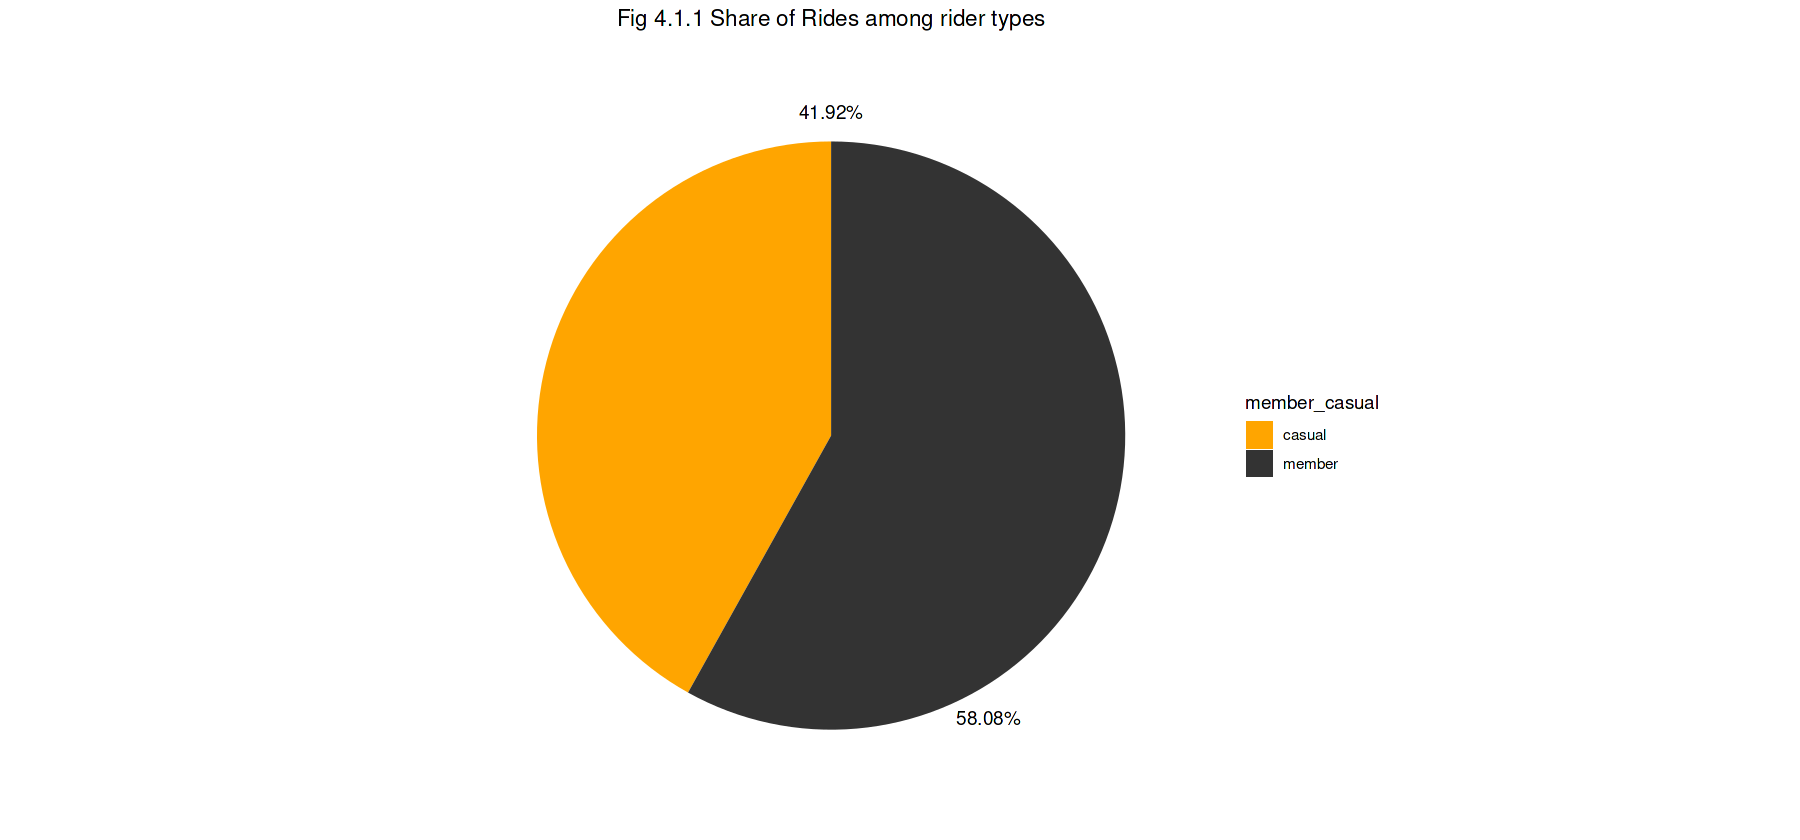

In [12]:
trips_share <- trips_full_clean %>%
 group_by(member_casual) %>%
 summarise(count = length(ride_id), 'Rider_Proportion' = (length(ride_id) / nrow(trips_full_clean))) %>%
 mutate(lab.ypos =cumsum(Rider_Proportion) - Rider_Proportion)

ggplot(trips_share, aes(x = '', y = Rider_Proportion, fill = member_casual)) +
 geom_bar(stat='identity', width=2) +
 coord_polar('y', start=0) + 
 theme_void() + 
 geom_text(aes(y =lab.ypos, label =percent(Rider_Proportion)), color='black', nudge_x=1.2,nudge_y=0 ) +
 labs(title = 'Fig 4.1.1 Share of Rides among rider types') +
 theme(plot.title = element_text(hjust = 0.5)) +
 scale_fill_manual(values = c("orange","gray20")) 

As per the above pie chart, we can see that share of member riders is bigger than that of casual.

### 4.2 Distribution of Ride Duration

First of all, let's look into the statistical summary of ride duration between user types in order to have an overall picture of this parameter:

In [13]:
trips_full_clean %>%
  group_by(member_casual) %>%
  summarise(min_duration = min(ride_duration), max_duration = max(ride_duration), median_duration = median(ride_duration), mean_duration = mean(ride_duration))

member_casual,min_duration,max_duration,median_duration,mean_duration
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,0,40705.017,13.883333,23.76758
member,0,1499.933,8.966667,12.58954


According to the above-provided summary, we can observe that the mean ride duration of casual users is higher than that of member users, so it means casual riders usually take the bikes for longer rides than member customers. However, the mean for both types of customers can be affected by outliers (as we see some suspicious data of ride duration equal to around 40 706 mins, which is making roughly 28 days), so firstly we need to check if this is the case.

Firstly, let's look into the distribution of the ride duration data by using the quantile() function, which is returning cutpoints (from 0% to 100% at the specified step of 5%):

In [14]:
distribution = quantile(trips_full_clean$ride_duration, seq(0, 1, by=0.05))
distribution

0%           5%          10%          15%          20%          25% 
    0.000000     2.466667     3.583333     4.433333     5.250000     6.050000 
         30%          35%          40%          45%          50%          55% 
    6.866667     7.733333     8.650000     9.633333    10.716667    11.933333 
         60%          65%          70%          75%          80%          85% 
   13.316667    14.933333    16.866667    19.283333    22.400000    26.633333 
         90%          95%         100% 
   33.166667    46.883333 40705.016667

We can see the following:
 * The difference in minutes between 0% and 100% is around 40 705 mins
 * The difference in minutes between 5% and 95% is around 44 mins

We can observe these outliers by visualizing the ride duration by means of a box plot:

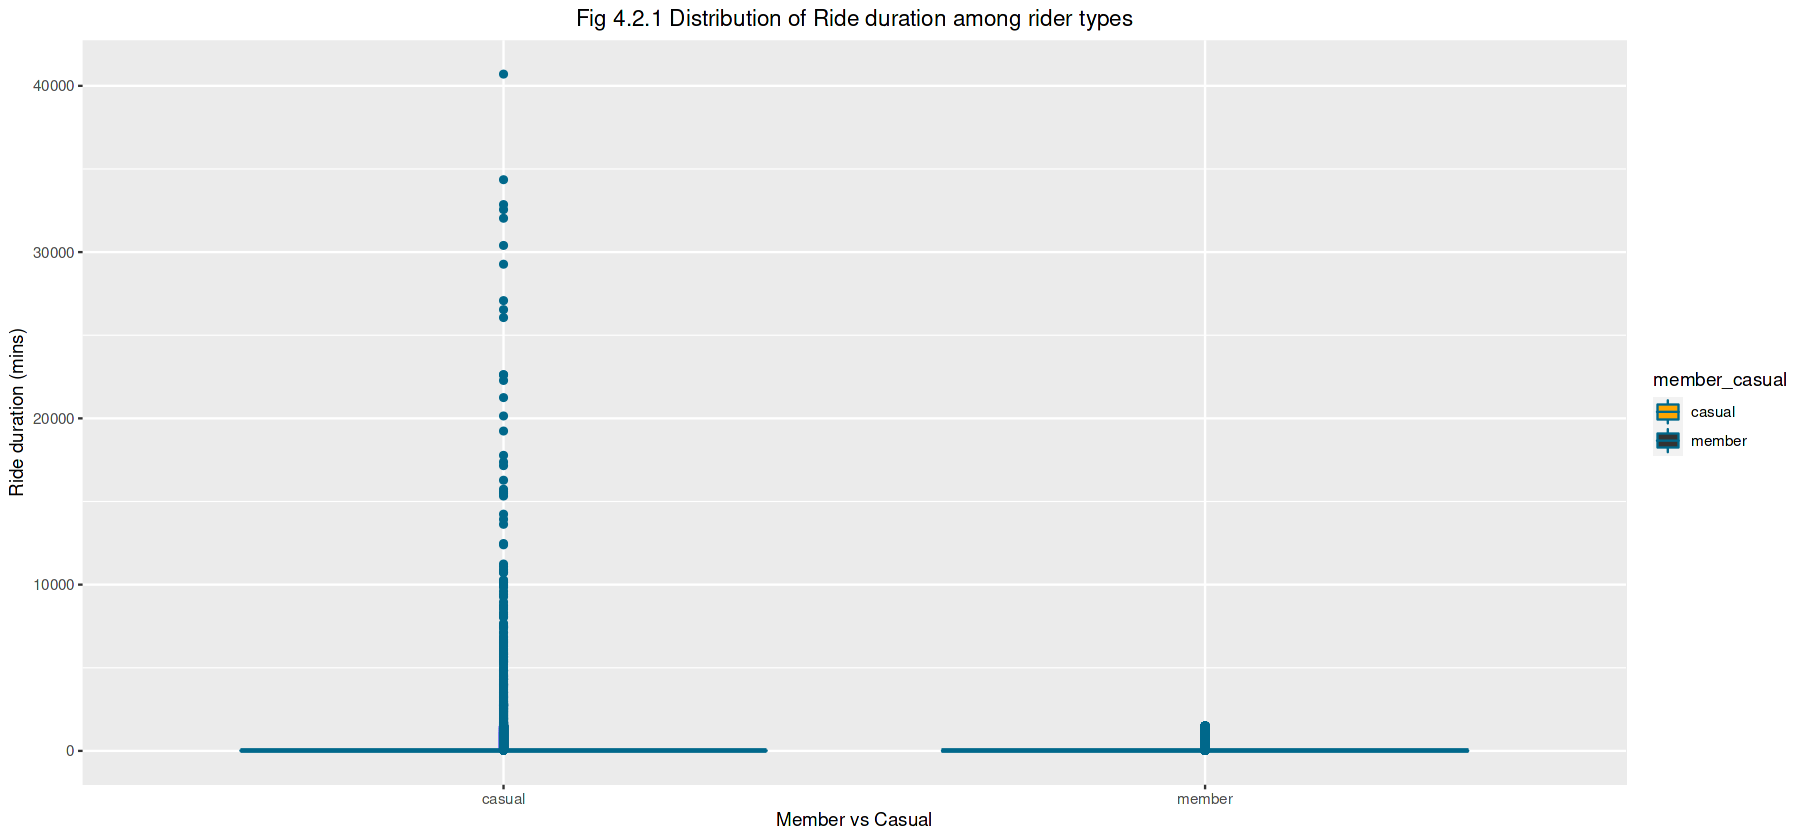

In [15]:
ggplot(trips_full_clean, aes(x=member_casual, y=ride_duration, fill=member_casual)) +
geom_boxplot(color='deepskyblue4') +
labs(x ='Member vs Casual', y='Ride duration (mins)', title='Fig 4.2.1 Distribution of Ride duration among rider types') +
theme(plot.title = element_text(hjust = 0.5)) +
scale_fill_manual(values = c("orange","gray20")) 

Thus, we can observe a large range of outliers for casual riders, which is affecting the mean of the data. It would be necessary to remove identified outliers to see the real picture:

In [16]:
trips_without_outliers <- trips_full_clean %>%
  filter(ride_duration > as.numeric(distribution['5%'])) %>%
  filter(ride_duration < as.numeric(distribution['95%'])) 

print(paste('Number of removed rows containing outliers is ', nrow(trips_full_clean) - nrow(trips_without_outliers)))

[1] "Number of removed rows containing outliers is  588665"


Now, let's replot the distribution of the ride duration data without outliers:

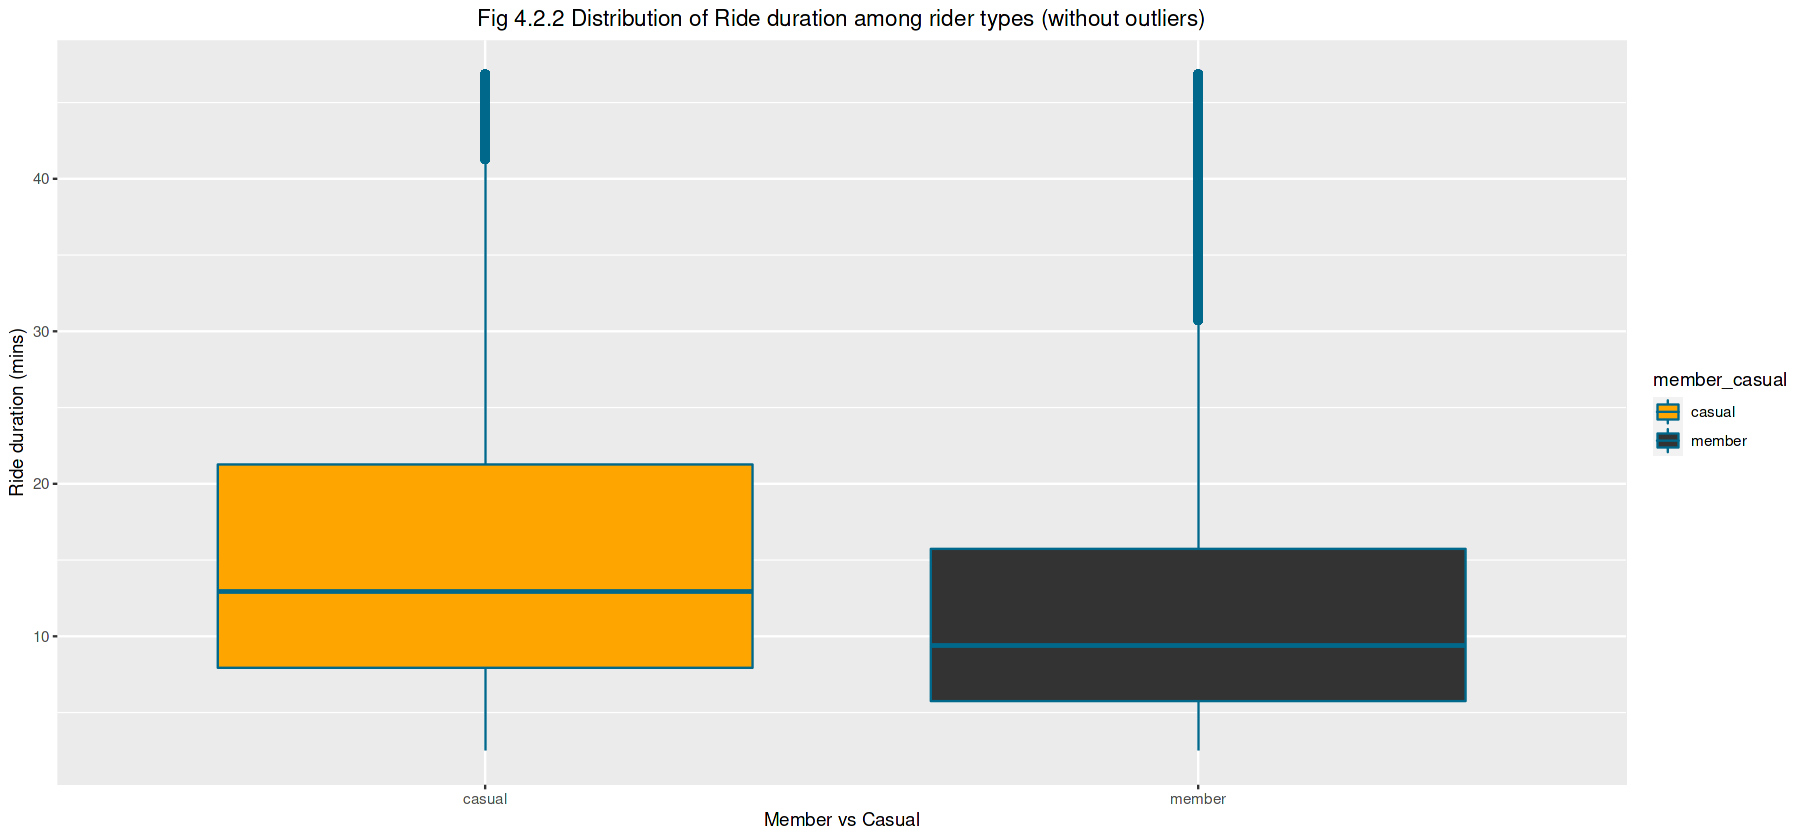

In [17]:
ggplot(trips_without_outliers, aes(x=member_casual, y=ride_duration, fill=member_casual)) +
geom_boxplot(color='deepskyblue4') +
labs(x ='Member vs Casual', y='Ride duration (mins)', title='Fig 4.2.2 Distribution of Ride duration among rider types (without outliers)') +
theme(plot.title = element_text(hjust = 0.5)) +
scale_fill_manual(values = c("orange","gray20")) 

Thus, we can confirm that the usually casual riders are using bikes for a longer period in comparison with members. In addition, we can see that the interquartile range (IQR) of casual riders is bigger. 

In addition, we can compare ride duration for both casual and member riders along the days of the week:

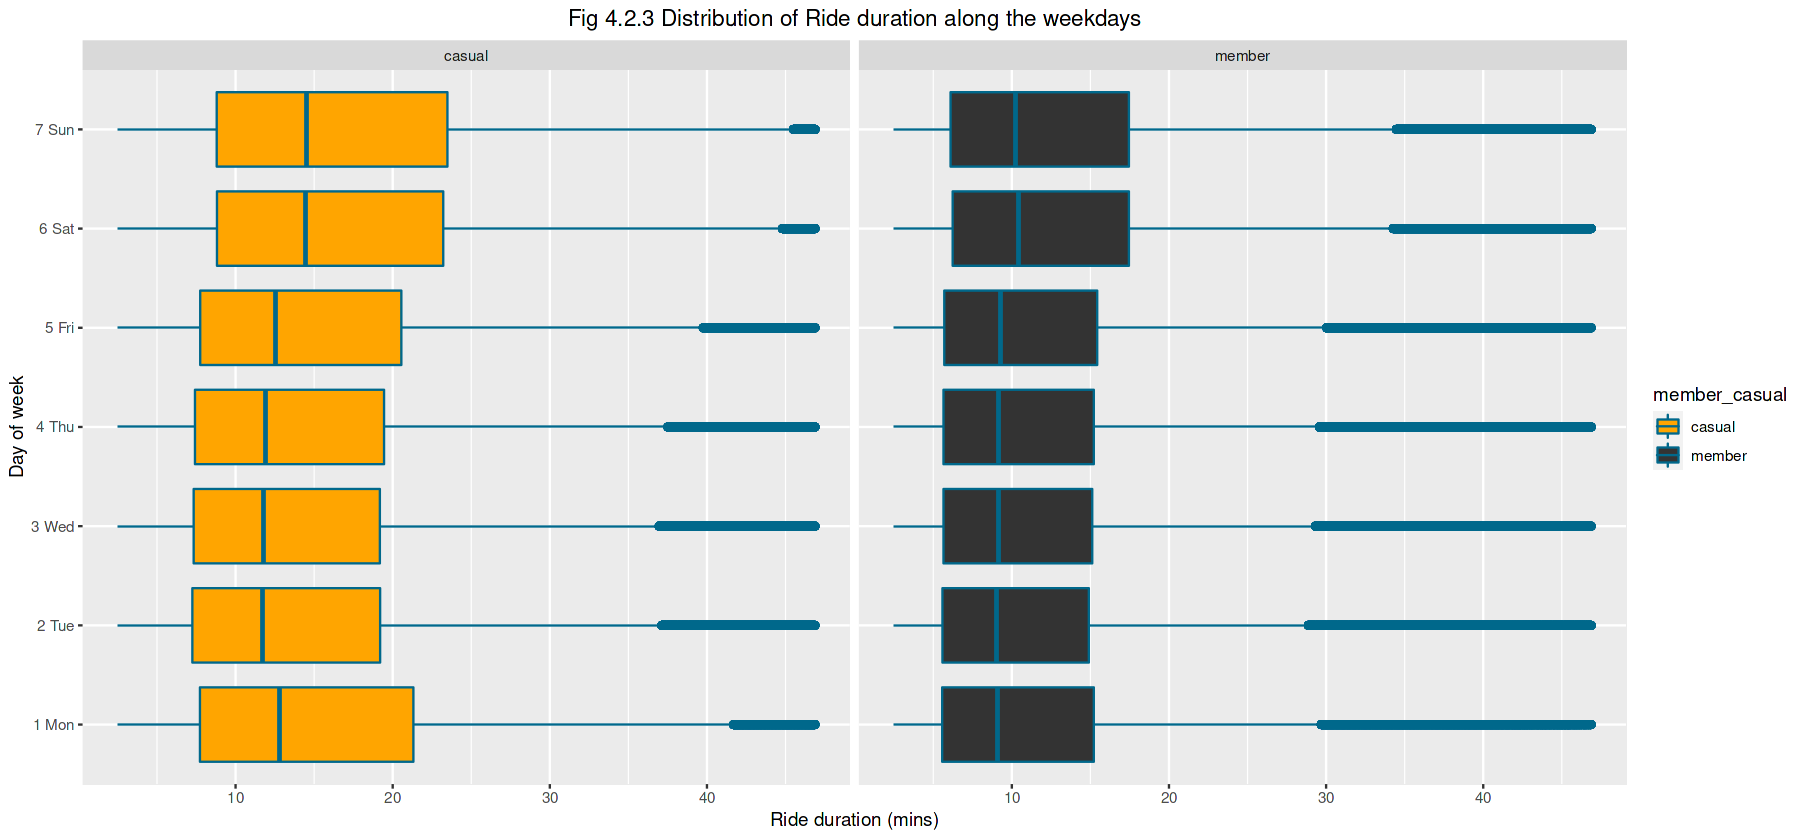

In [18]:
ggplot(trips_without_outliers, aes(x=ride_duration, y=day_of_week, fill=member_casual)) +
geom_boxplot(color='deepskyblue4') +
facet_wrap(~member_casual) +
labs(x='Ride duration (mins)', y='Day of week', title= 'Fig 4.2.3 Distribution of Ride duration along the weekdays') +
theme(plot.title = element_text(hjust = 0.5)) +
scale_fill_manual(values = c("orange","gray20")) 

As per the above visualization, we can observe that the ride duration of casual riders is higher on weekends, while for member riders this parameter is consistent along all days of the week.

In the end, we can compare the ride duration for both casual and member riders between various types of bikes used:

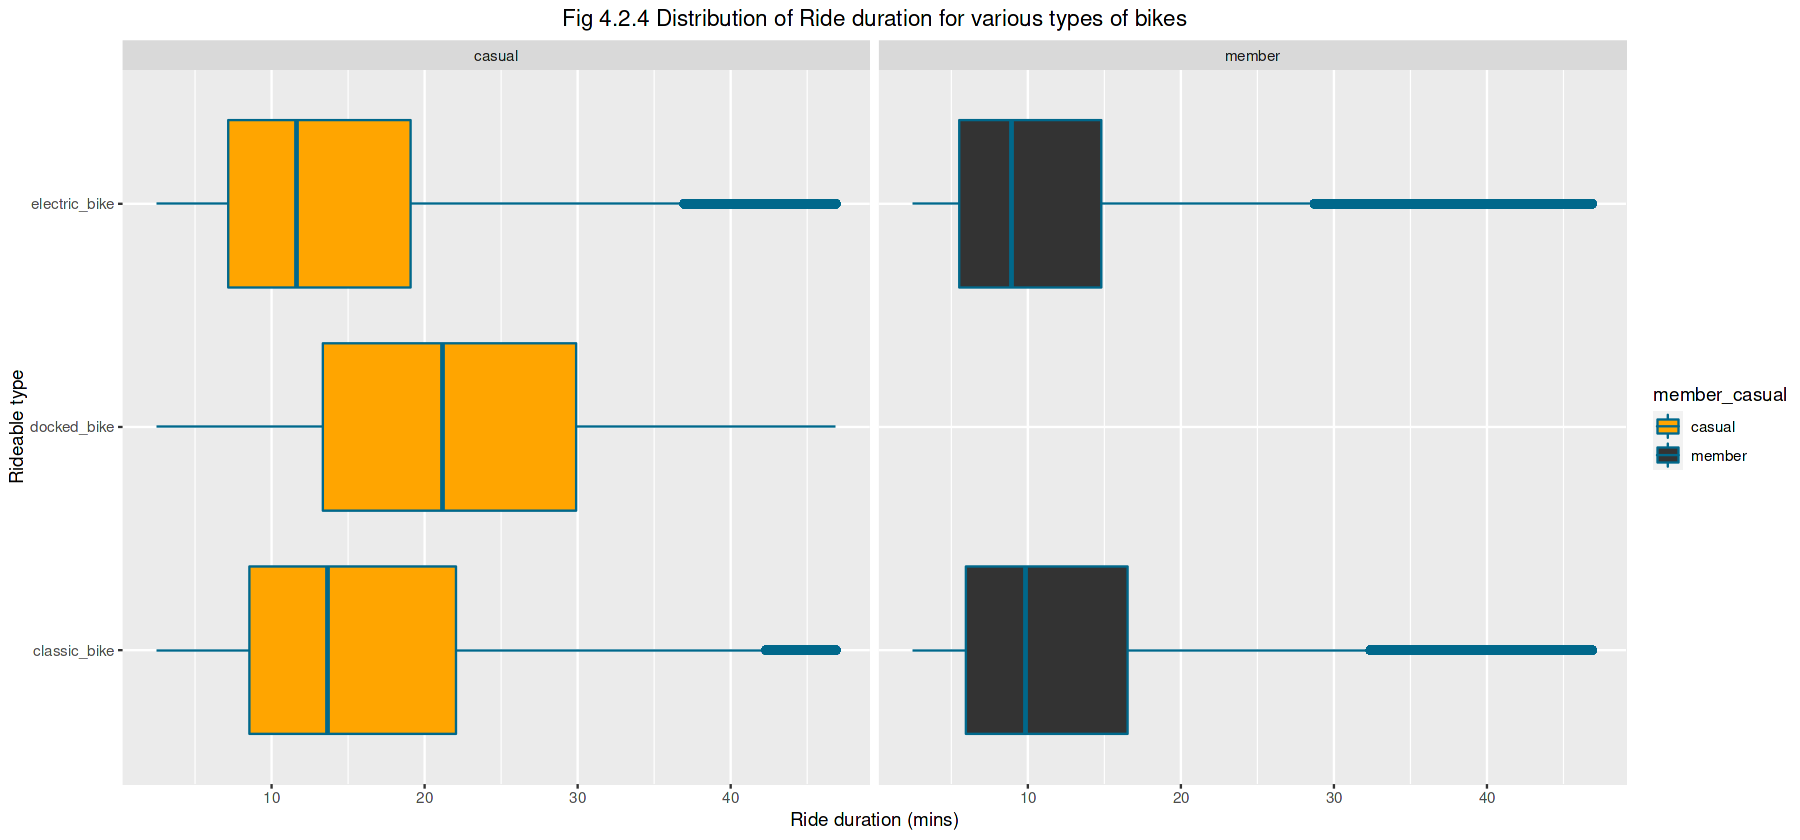

In [19]:
ggplot(trips_without_outliers, aes(x=ride_duration, y=rideable_type, fill=member_casual)) +
geom_boxplot(color='deepskyblue4') +
facet_wrap(~member_casual) +
labs(x='Ride duration (mins)', y='Rideable type', title= 'Fig 4.2.4 Distribution of Ride duration for various types of bikes') +
theme(plot.title = element_text(hjust = 0.5)) +
scale_fill_manual(values = c("orange","gray20")) 

From this visualization, we can state that docked bikes are most popular for longer trips among casual riders. The ride duration of both classic and electric bikes is almost the same for both types of riders, but overall it's higher for casual riders by comparing with members. It is worth noting that there is no usage record of docked bikes by member riders.

Finally, let's look into the average ride duration distribution along the months, to reveal if there is any trend for both types of riders:

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


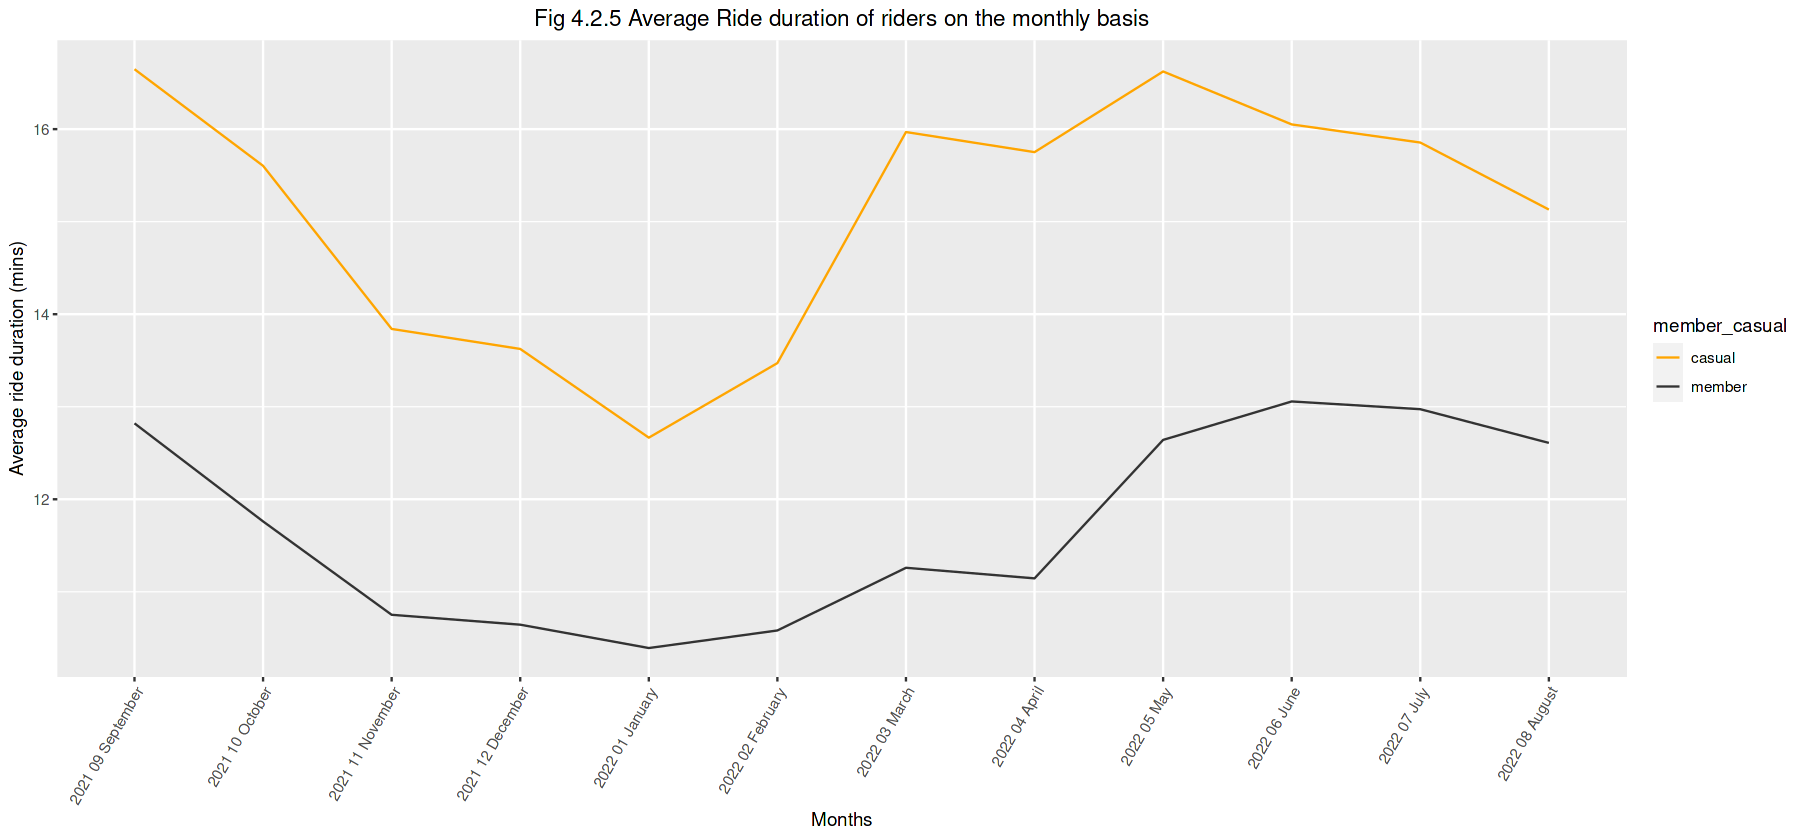

In [20]:
avg_ride_duration <- trips_without_outliers %>% 
  group_by(month,member_casual) %>%
  summarise(mean=mean(ride_duration))

ggplot(avg_ride_duration, aes(x=month, y=mean, group=member_casual)) +
labs(x='Months', y='Average ride duration (mins)', title="Fig 4.2.5 Average Ride duration of riders on the monthly basis")+
geom_line(aes(color=member_casual)) +
theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
theme(plot.title = element_text(hjust = 0.5)) +
scale_color_manual(values = c("orange","gray20"))
options(dplyr.summarise.inform = FALSE)

We can conclude the following from the overall ride duration analysis:
 * General observed pattern is that usage of bikes for a long duration is more popular for casual riders
 * Weekends are the most preferred time for usage of bikes by casual riders, while for members riders the usage along the days of the week is consistent
 * Docked bikes are only being used by casual riders for longer trips, while classic and electric bikes are having almost identical popularity among each type of riders
 * Average ride duration for both casual and member riders is declining from warm to cold months, reaching bottom in December-January. However, this parameter is growing in the opposite direction from the cold months to the warm, reaching the peak in May for casual riders and June for member riders.

### 4.3 Distribution of Rideable Types among Riders

We can make a comparison between the types of bikes used between casual and member riders. For this, we can calculate the proportion of users for each type of bike:

In [21]:
trips_full_clean %>%
   group_by(rideable_type) %>%
   summarise(count = length(ride_id), 'Bike_proportion' = (length(ride_id)/ nrow(trips_full_clean)) *100,
  'Members_proportion' = (sum(member_casual == 'member') / length(ride_id)) *100,
  'Casual_proportion' = (sum(member_casual == 'casual') / length(ride_id)) *100,
  'Dfference' = Members_proportion - Casual_proportion )

rideable_type,count,Bike_proportion,Members_proportion,Casual_proportion,Dfference
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
classic_bike,2893086,49.225751,64.44133,35.55867,28.88265
docked_bike,205772,3.501203,0.00000,100.00000,-100.00000
electric_bike,2778322,47.273046,55.76780,44.23220,11.53560


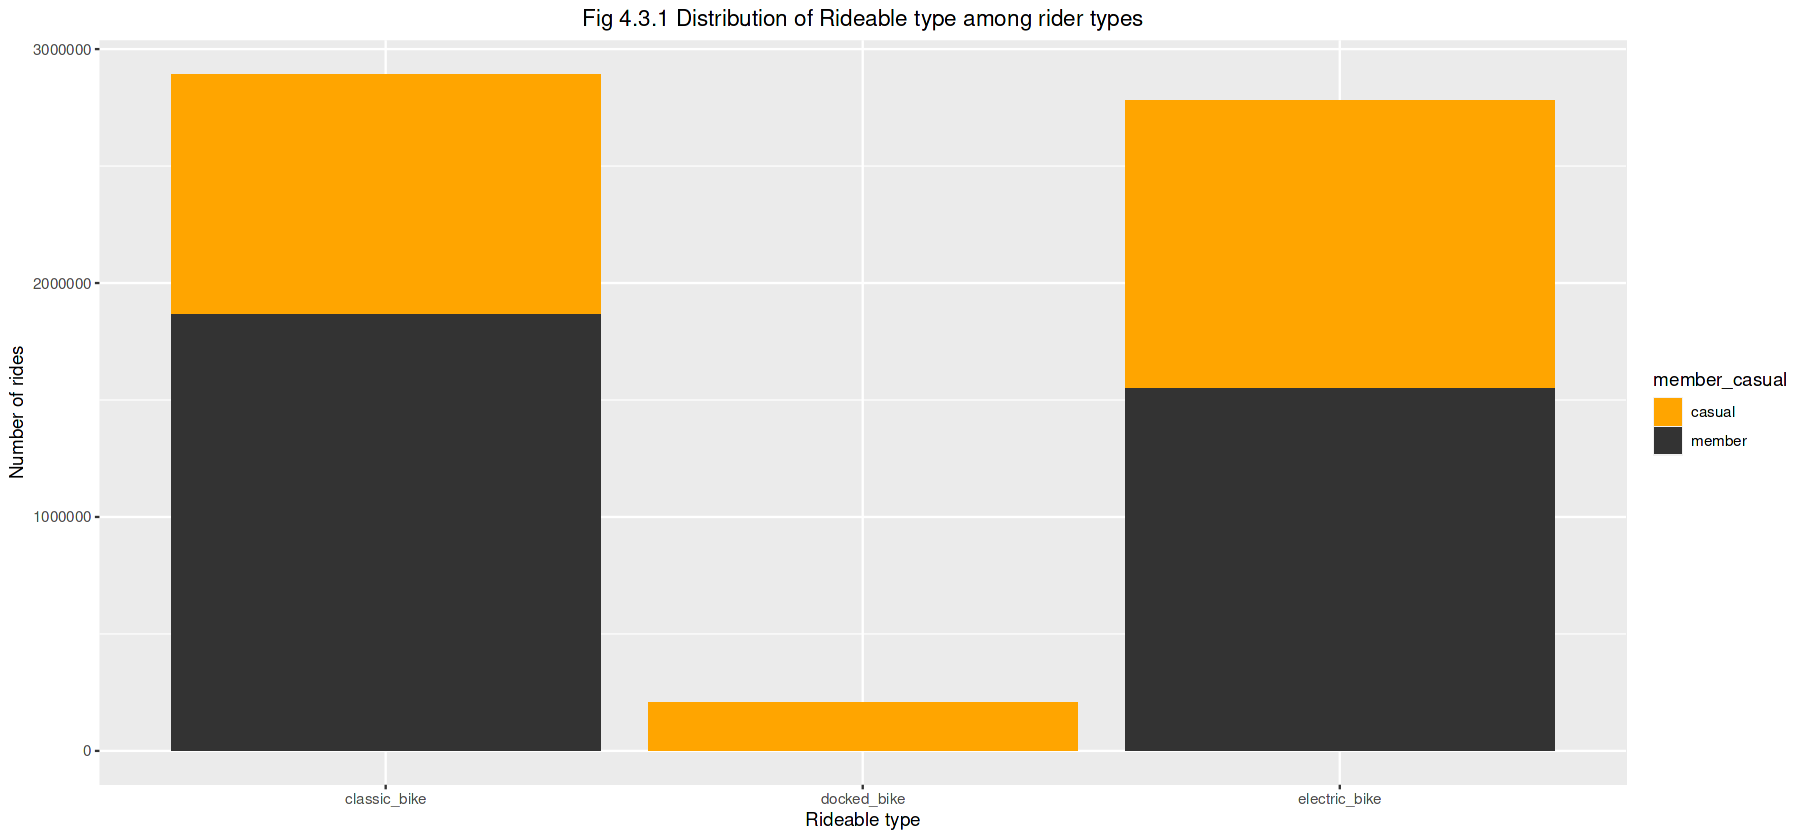

In [22]:
ggplot(trips_full_clean, aes(rideable_type, fill=member_casual)) +
labs(x='Rideable type', y='Number of rides', title = 'Fig 4.3.1 Distribution of Rideable type among rider types') +
geom_bar() +
theme(plot.title = element_text(hjust = 0.5)) +
scale_fill_manual(values = c("orange","gray20")) +
scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

We can conclude the following from this analysis:
 * Member type of riders have a higher preference for classic and electric bikes, the difference with casual riders is about 29% and 12% accordingly
 * All docked bikes for the period being analyzed were only used by casual riders, but their proportion of usage (4%) is significantly low in comparison with classic (49%) and electric bikes (47%).

### 4.4 Distribution of Rides among Riders on weekday basis

We can figure out how the usage pattern by casual and member riders differ over the week. Firstly, let's retrieve the data regarding the number of rides between casual and member riders for each day of the week:

In [23]:
trips_full_clean %>%
  group_by(day_of_week) %>%
  summarise(count = length(ride_id),'Day of week Proportion' = (length(ride_id)/ nrow(trips_full_clean)) *100, 
  'Members_proportion' = (sum(member_casual == 'member') / length(ride_id)) *100,
  'Casual_proportion' = (sum(member_casual == 'casual') / length(ride_id)) *100,
  'Dfference' = Members_proportion - Casual_proportion ) %>%
  arrange(day_of_week)

day_of_week,count,Day of week Proportion,Members_proportion,Casual_proportion,Dfference
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1 Mon,766303,13.03862,61.95030,38.04970,23.900598
2 Tue,813842,13.84749,65.90677,34.09323,31.813546
3 Wed,839650,14.28661,65.13583,34.86417,30.271661
4 Thu,836284,14.22934,62.82184,37.17816,25.643681
5 Fri,817378,13.90766,57.75394,42.24606,15.507880
6 Sat,962911,16.38389,47.13966,52.86034,-5.720674
7 Sun,840812,14.30639,48.09458,51.90542,-3.810840


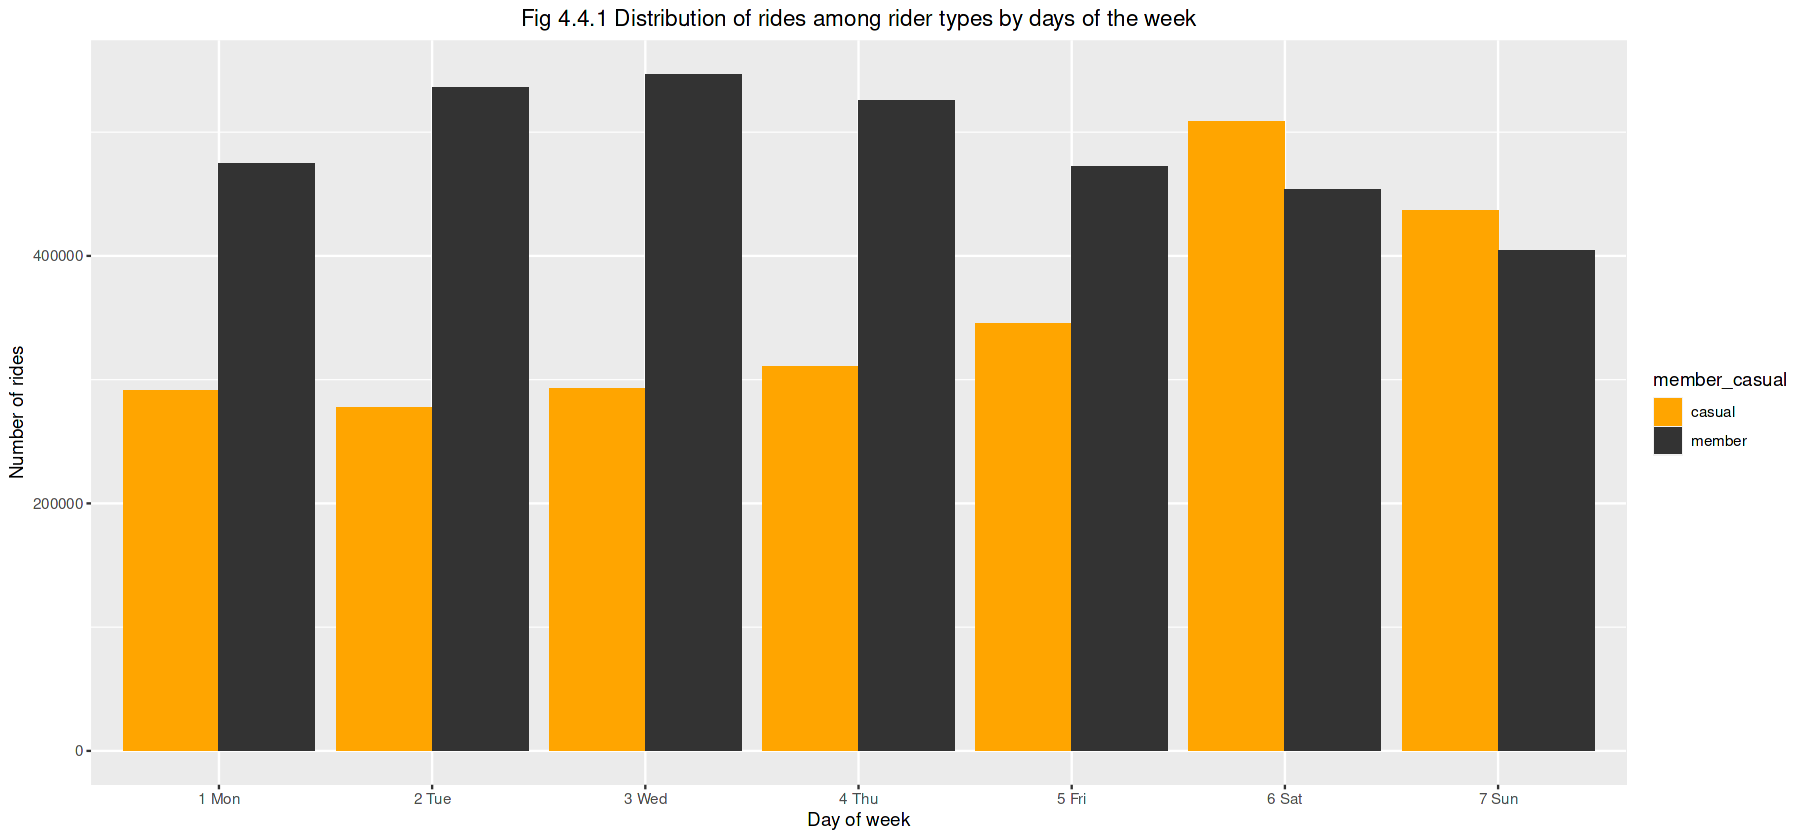

In [24]:
ggplot(trips_full_clean, aes(day_of_week, fill=member_casual)) +
    geom_bar(position='dodge') +
    labs(x='Day of week', y='Number of rides', title="Fig 4.4.1 Distribution of rides among rider types by days of the week") +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_fill_manual(values = c("orange","gray20")) +
    scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

We can conclude the following from this analysis:
 * The usage of the bikes is at its peak on Saturday
 * General pattern is that member riders tend to use bikes more often than a casual type
 * Casual riders prefer to use bikes on weekends more often than on weekdays.

### 4.5 Distribution of Rides among Riders on monthly basis

In addition, we can identify the usage pattern of bikes by month. We need to summarise data for the usage of bikes between casual and member rides for each month of the period specified:

In [25]:
trips_full_clean %>%
  group_by(month) %>%
  summarise(count = length(ride_id),'Month Proportion' = (length(ride_id)/ nrow(trips_full_clean)) *100, 
  'Members_proportion' = (sum(member_casual == 'member') / length(ride_id)) *100,
  'Casual_proportion' = (sum(member_casual == 'casual') / length(ride_id)) *100,
  'Dfference' = Members_proportion - Casual_proportion )

month,count,Month Proportion,Members_proportion,Casual_proportion,Dfference
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2021 09 September,755516,12.855077,51.89248,48.10752,3.784963
2021 10 October,630742,10.732052,59.28193,40.71807,18.563850
2021 11 November,359734,6.120861,70.32391,29.67609,40.647812
2021 12 December,247396,4.209434,71.86090,28.13910,43.721806
2022 01 January,103683,1.764162,82.19380,17.80620,64.387605
2022 02 February,115532,1.965773,81.51075,18.48925,63.021501
2022 03 March,283774,4.828404,68.41078,31.58922,36.821555
2022 04 April,370932,6.311394,65.99889,34.00111,31.997779
2022 05 May,634135,10.789784,55.88258,44.11742,11.765160


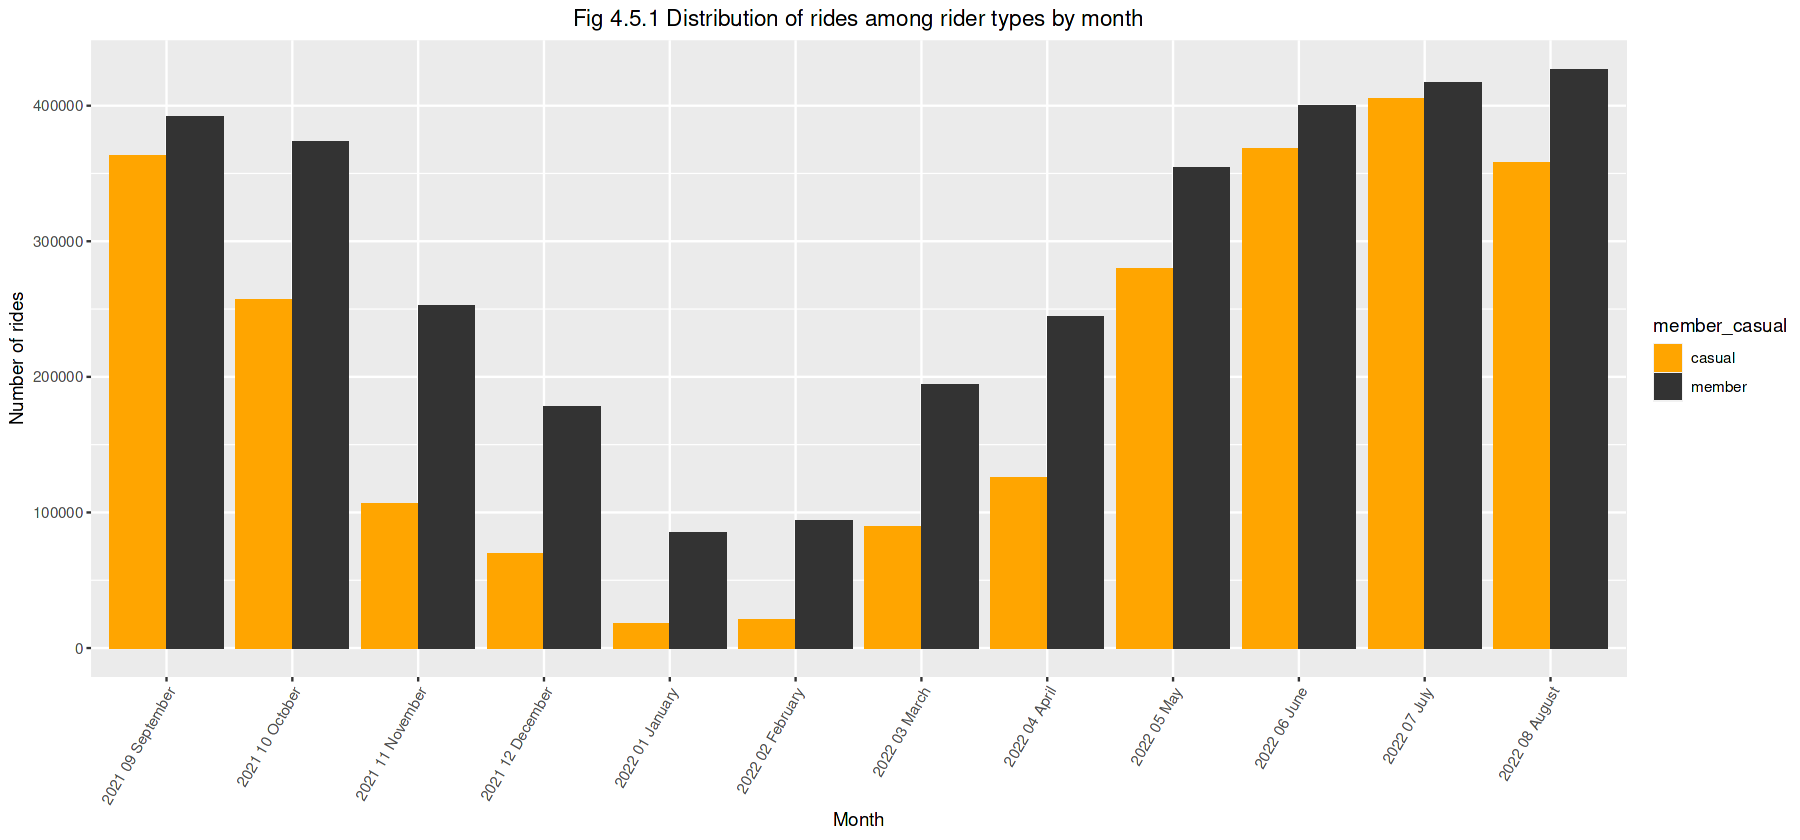

In [26]:
ggplot(trips_full_clean, aes(month, fill=member_casual)) +
    geom_bar(position='dodge') +
    labs(x='Month', y='Number of rides', title="Fig 4.5.1 Distribution of rides among rider types by month") + 
    theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_fill_manual(values = c("orange","gray20")) +
    scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

We can conclude the following from this analysis:
 * The peak of bike usage is observed for the summer months (13%-14% by proportion)
 * The proportion of member riders is higher than that of casual riders in all months, but the lowest difference can be considered for the June-July months (1%-4%)
 * The winter months can be considered the least popular for bike sharing for both member and casual riders.

### 4.6 Distribution of Rides among Rideable types on monthly basis

In addition, let's compare the number of rides for each type of bike on the monthly basis for both causal and member riders, to see the different preferences for both groups:

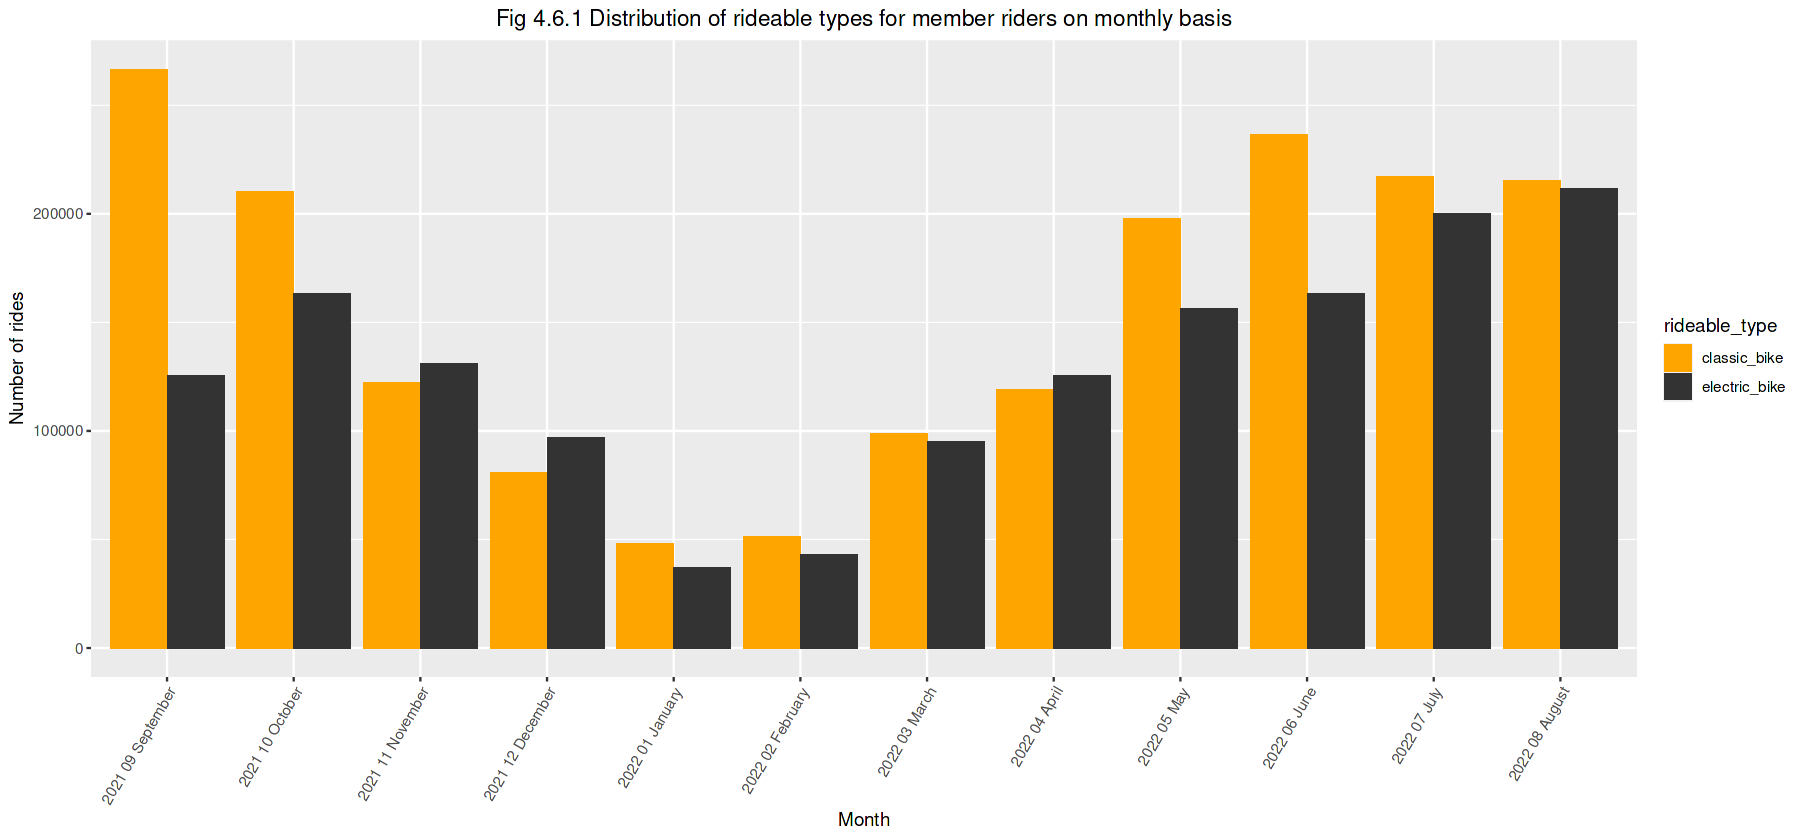

In [27]:
trips_members <- trips_full_clean %>%
  filter(member_casual == 'member') %>%
  group_by(rideable_type, month) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(rideable_type, month) 

ggplot(trips_members, aes(x = month, y = number_of_rides, fill = rideable_type)) +
geom_col(position = "dodge") + 
labs(title="Fig 4.6.1 Distribution of rideable types for member riders on monthly basis", x = "Month", y = "Number of rides") + 
theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
theme(plot.title = element_text(hjust = 0.5)) +
scale_fill_manual(values = c("orange","gray20")) +
scale_y_continuous(labels = function(x) format(x, scientific = FALSE))
options(dplyr.summarise.inform = FALSE)

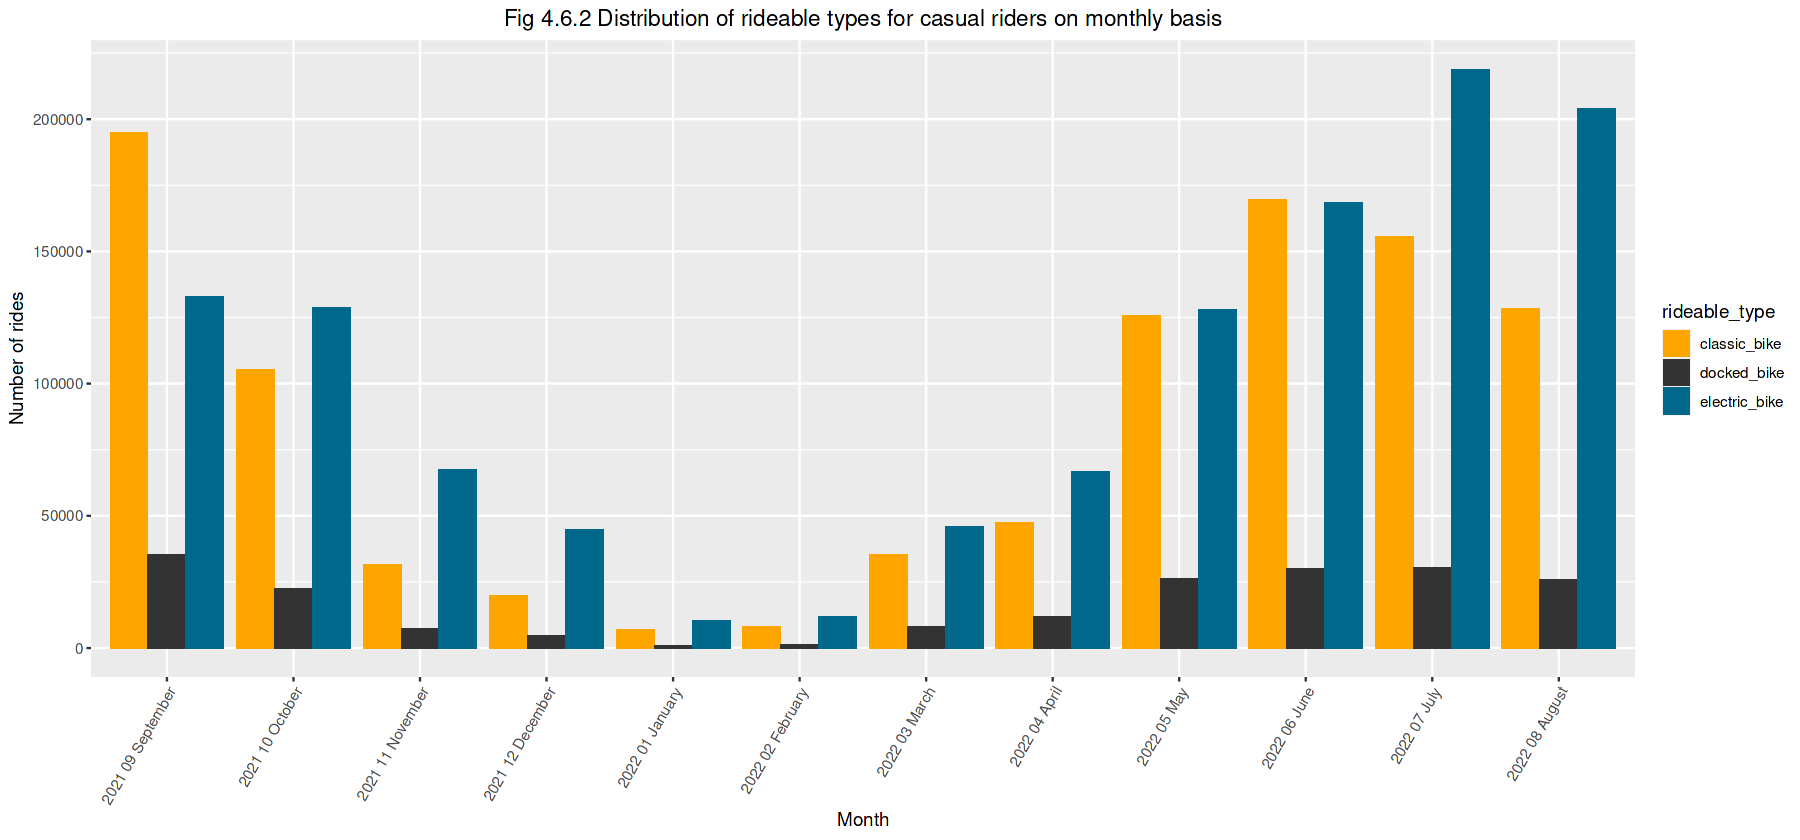

In [28]:
trips_casual <- trips_full_clean %>%
  filter(member_casual == 'casual') %>%
  group_by(rideable_type, month) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(rideable_type, month) 

ggplot(trips_casual, aes(x = month, y = number_of_rides, fill = rideable_type)) +
geom_col(position = "dodge") + 
labs(title="Fig 4.6.2 Distribution of rideable types for casual riders on monthly basis", x = "Month", y = "Number of rides") + 
theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
theme(plot.title = element_text(hjust = 0.5)) +
scale_fill_manual(values = c("orange","gray20", "deepskyblue4")) +
scale_y_continuous(labels = function(x) format(x, scientific = FALSE))
options(dplyr.summarise.inform = FALSE)

We can conclude the following from this analysis:
 * Electric bikes are more popular among casual riders almost during the whole period except September, in which the classic bikes are dominating
 * Classic bikes are more preferred than electric bikes by member riders almost during the whole period being analyzed, only excluding some cold months of the year (November and December).

### 4.7 Distribution of Rides among Riders on hourly basis

In the end, let's analyze the popularity of rides during the different hours of the weekdays. Heatmaps in this case will be more effective for identifying the trends between casual and member types:

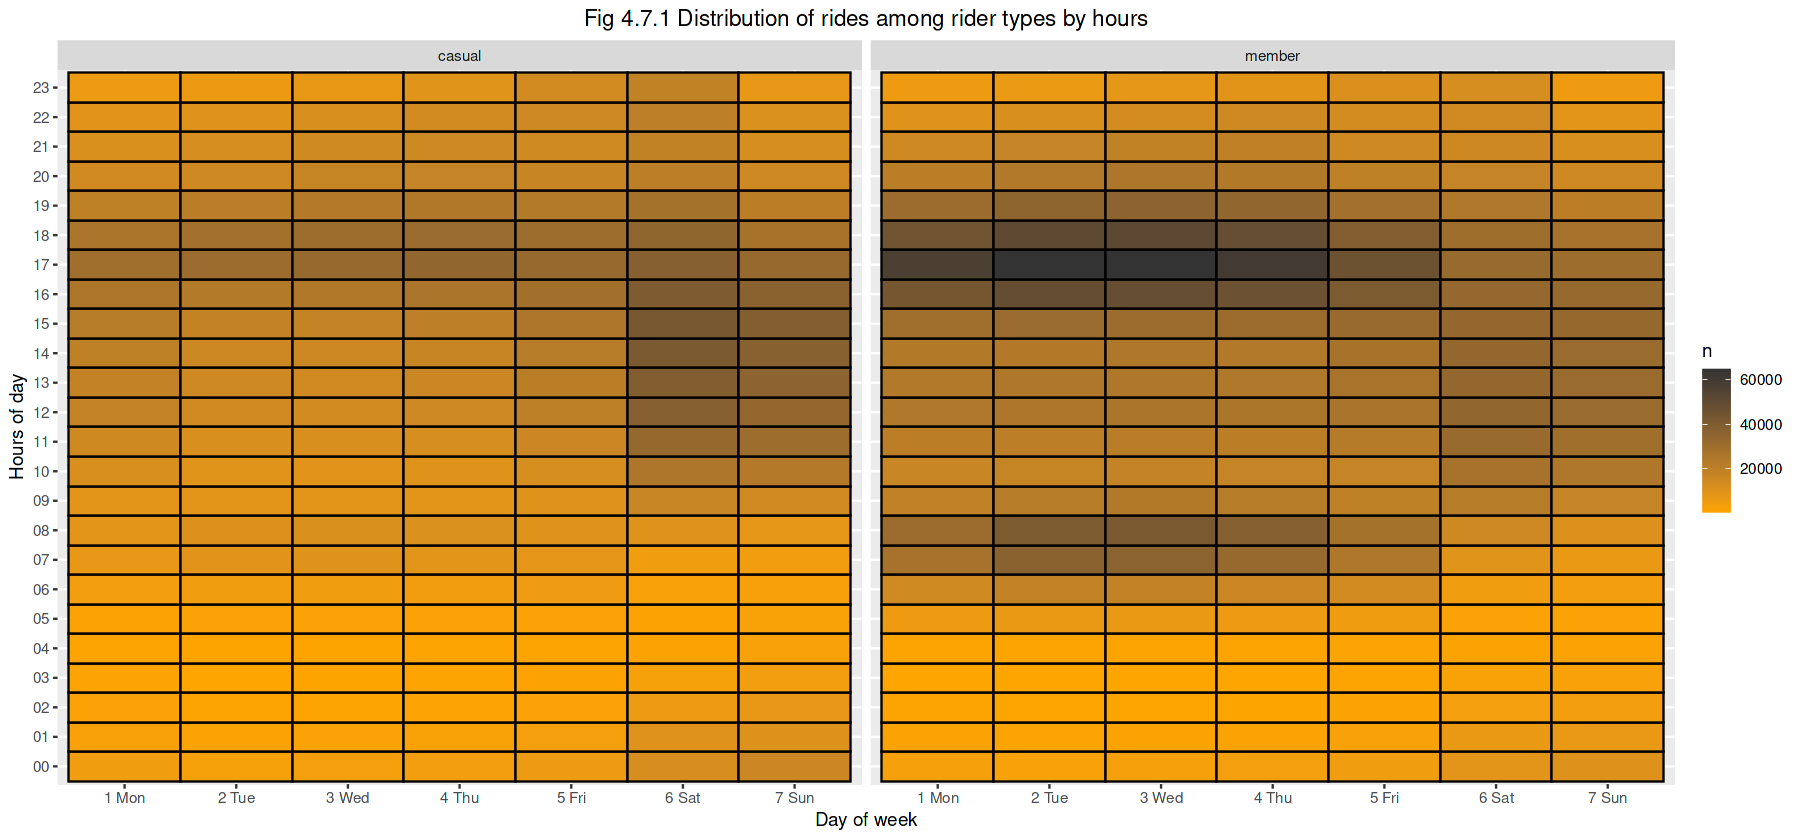

In [29]:
heatmap <- trips_full_clean %>%
   group_by(day_of_week, time, member_casual) %>%
   tally()

ggplot(heatmap, aes(x=day_of_week, y= time, fill = n)) +
geom_tile(color = 'black', size = 0.5) +
scale_fill_gradient(low='orange', high='gray20') +
labs(title='Fig 4.7.1 Distribution of rides among rider types by hours', x='Day of week', y='Hours of day') +
theme(plot.title = element_text(hjust = 0.5)) +
facet_wrap(~member_casual)

Furtherly, in order to see the hourly distribution difference between weekdays and weekends for both casual and member riders, we can use the stacked bar chart, as the following:

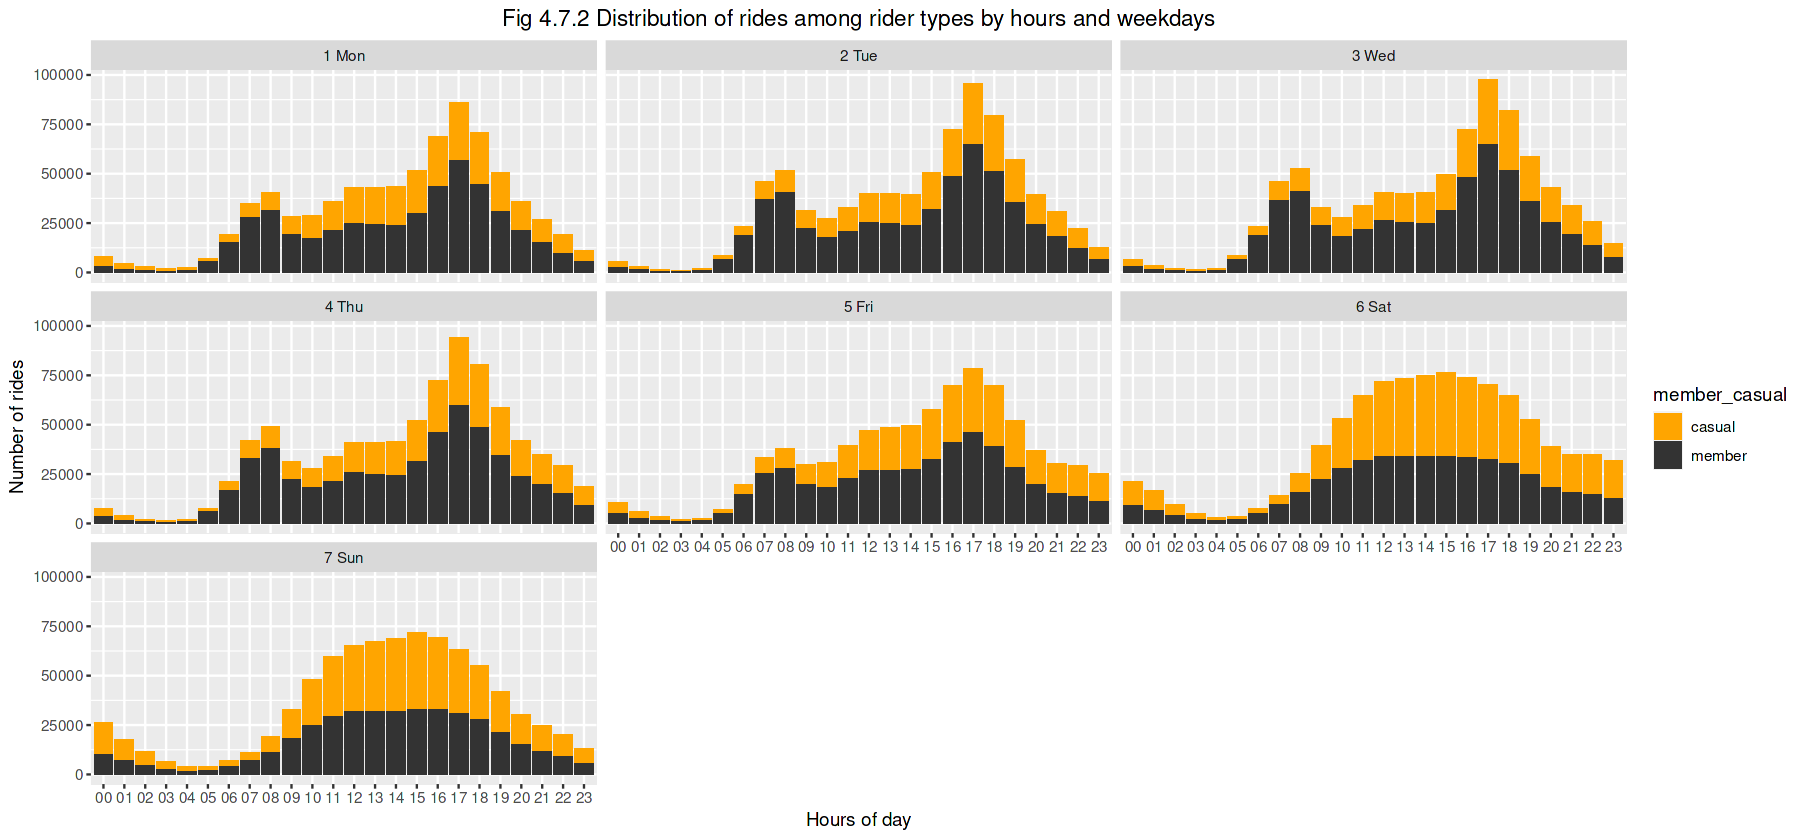

In [30]:
trips_full_clean %>%
  ggplot(aes(time, fill=member_casual)) +
  geom_bar() +
  labs(x = 'Hours of day', y = 'Number of rides', title = 'Fig 4.7.2 Distribution of rides among rider types by hours and weekdays') +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_fill_manual(values = c("orange","gray20")) +
  facet_wrap(~day_of_week)

We can conclude the following from this analysis:
 * We can observe that there is a smooth flow of data on weekends, while on weekdays it is steeper
 * On weekdays, there is mostly bimodal distribution, which is due to high usage of bikes mostly by member riders between 7 am and 9 am (first peak) and from 4 pm to 7 pm (second peak)
 * On weekends, there is almost unimodal distribution caused by the high demand for bikes by casual riders between 10 am to 6 pm.
 
The main reason for the last two points is that member riders are using bikes mostly for home-work-home routine or educational purposes on weekdays, so it's affecting the hourly distribution of rides accordingly, while casual riders mostly are riding for leisure purposes on weekends, which seems normal for causing this kind of hourly distribution.

# 5. Share

In this section, we will look into the insights retrieved from this analysis, which will be crucial for the marketing team to catch points regarding how casual riders' and annual members' usage patterns differ from each other.

Further, recommendations for converting casual riders into annual members will be provided in the 'Act' section of this case study.

Overall, based on the compelling data insights and plotted visualizations above, we can emphasize the following points to be considered by the marketing team:
 * It is worth noting that the share of overall rides used by member riders is **~16%** bigger than that of casual riders (**Fig 4.1.1**)
 
 * By calculating the ride duration (mins) and comparing this parameter between two groups, we can conclude that casual riders mostly use bikes for longer trips (**Fig 4.2.2**)
 
 * The visualization of the box plot illustrates the ride duration for each day of the week, by looking into the plot it's revealed that the ride duration of casual riders is higher on weekends in comparison with the rest of the week, while for member riders this parameter is stable along the week (**Fig 4.2.3**)
 
 * In addition, it is worth noting that casual riders for longer trips mostly prefer docked bikes, while ride duration by using electric and classic bikes is almost the same within each group (**Fig 4.2.4**) 
 
 * By looking into the monthly distribution, we can emphasize that cold months are the least preferred time for riding for both casual and member riders (from January to March months the proportion of a number of rides is **1%-4%**), while warm months are indicating the peak of popularity for bikes (from June to September the proportion of a number of rides is **13%-14%**)(**Fig 4.5.1**). The same pattern can be observed by analyzing the average ride duration among months (**Fig 4.2.5**)
 
 * By comparing the types of bikes between the two groups, we can state that electric bikes are most popular among casual riders (**Fig 4.6.2**), while member riders prefer classic bikes almost during the whole period of the year (**Fig 4.6.1**)
 
 * As per the analysis of the distribution of rides by weekdays, casual riders are dominating on the weekends mostly using the bikes for leisure purposes in the time period from **10 am to 6 pm**. On other days, member riders are prevailing by riding bikes mostly in the time period from **7 am to 9 am** and from **4 pm to 7 pm** (**Fig 4.7.2**).
 
Generally, it is now clear that the dominating part of member riders use bikes for routine activities, such as going from home to work or for educational purposes, while casual riders tend to use Cyclistic bikes for leisure and sports activities. Another interesting point is that the temperature can be considered now as one of the crucial factors affecting the demand for bikes among both groups, while it is most obvious from casual rider data. 

All these insights can be shared now with the marketing team, since these insights will support them to initiate a marketing campaign in a strategically proper way.

# 6. Act

Finally, below are top recommendations for the marketing team as per analysis results:
 * During the design of the marketing campaign, the health and environmental benefits of using bikes regularly can be promoted in order to ensure casual riders use bikes on weekdays at the same level as on weekends. For example, some rewarding mechanisms can be implemented for users by reaching some challenging goals within the month (burning a specified amount of calories by riding, riding the specified distance or duration, etc.)
 
 * Some discounts on membership fees after the first year can be applied in order to attract more casual riders to the membership option
 
 * There are various zero-emission goal policies applied by different governmental bodies, which push various businesses to reduce greenhouse gas emissions and other climate-related impacts. By taking this into account, the marketing team can design special offerings for different companies operating and having offices within Chicago to motivate their employees to take up membership options and use bikes as routine transportation vehicle.
 
 * Lastly, as casual riders prefer to use bikes for long trips, the marketing team can provide some benefit schemas for the membership. For instance, by reaching some specified timestamp per one ride by casual riders, they can provide some bonuses within the membership option. 
 
Regarding other potential follow-ups, it would be better to have some demographic data of riders for further exploration. This will potentially allow us to get more insights into the target audience and come up with new recommendations. In addition, it would be nice to have the pricing details for both membership and casual rides. This data will enable us to look into the cost aspects of each option and design a more financially secure marketing campaign by not affecting the profit margin.

# Ackowledgement

**Thanks for reading!**

I would like to express my gratitude to the [**Google Data Analytics Coursera team**](https://www.coursera.org/professional-certificates/google-data-analytics) for an amazing course delivered. Although, I prefer to use Python for analysis, working with R on this capstone project is an invaluable experience for me. Thanks to **Kaggle** and **Rstudio** communities for the great forums and documentation, which supported me in choosing the right tools and functions for this project.